# TPC1: Análise de dados: doença cardíaca

Descarregue o ficheiro de dados: `myheart.csv`
Crie um programa em Python, conjunto de funções, que responda às seguintes questões:
* Crie uma função que lê a informação do ficheiro para um modelo, previamente pensado em memória;
* Pense num modelo para guardar uma distribuição;
* Crie uma função que calcula a distribuição da doença por sexo;
* Crie uma função que calcula a distribuição da doença por escalões etários. Considere os seguintes escalões: [30-34], [35-39], [40-44], ...
* Crie uma função que calcula a distribuição da doença por níveis de colesterol. Considere um nível igual a um intervalo de 10 unidades, comece no limite inferior e crie os níveis necessários até abranger o limite superior;
* Crie uma função que imprime na forma de uma tabela uma distribuição;
* Especifique um programa que ao executar apresenta as tabelas correspondentes às distribuições pedidas;
* Extra: explore o módulo matplotlib e crie gráficos para as suas distribuições.

+------------+------------+------------+------------+
|   (0, 'F') |   (0, 'M') |   (1, 'F') |   (1, 'M') |
|------------+------------+------------+------------|
|        129 |        242 |         40 |        428 |
+------------+------------+------------+------------+
+---------+--------+----------+--------------+-------------+-------------+
|   idade | sexo   |   tensão |   colesterol |   batimento |   temDoença |
|---------+--------+----------+--------------+-------------+-------------|
|      37 | M      |      130 |          283 |          98 |           0 |
|      37 | M      |      140 |          207 |         130 |           1 |
|      37 | F      |      130 |          211 |         142 |           0 |
|      38 | M      |      110 |          196 |         166 |           1 |
+---------+--------+----------+--------------+-------------+-------------+
+---------+--------+----------+--------------+-------------+-------------+
|   idade | sexo   |   tensão |   colesterol |   batime

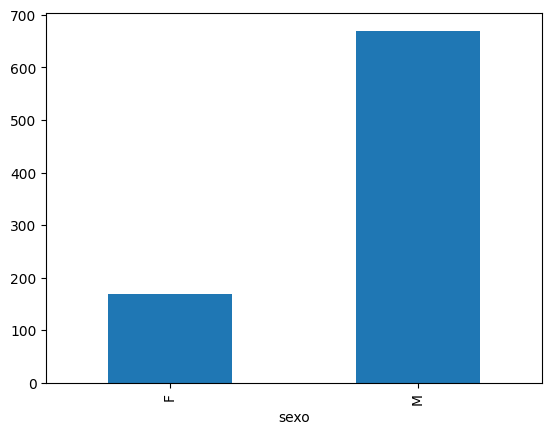

In [1]:
# Using outside imports: pandas, tabulate
import pandas as pd
import tabulate as tb
import matplotlib.pyplot as plt

dataset:pd.DataFrame = None


def load_data(path:str):
    global dataset
    dataset = pd.read_csv(path)

def get_sickness_distribution_by_gender():
    return [dataset.groupby(['temDoença','sexo']).size()]

def get_sickness_by_age(age:tuple[int,int]):
    age = list(range(age[0],age[1]))
    return dataset[dataset['idade'].isin(age)]

def get_sickness_by_cholesterol(cholesterol:tuple[int,int]):
    cholesterol = list(range(cholesterol[0],cholesterol[1]))
    return dataset[dataset['colesterol'].isin(cholesterol)]

def table(df:pd.DataFrame):
    print(tb.tabulate(df, headers='keys', tablefmt='psql',showindex=False))

def plot_gender(dataset:pd.DataFrame):
    dataset.groupby('sexo').size().plot(x='sexo',kind='bar')
    plt.show()

def main():
    load_data("PL2023_TPC1.csv")
    #print(dataset.head(4))
    #print(dataset.dtypes)
    table(get_sickness_distribution_by_gender())
    table(get_sickness_by_age((35,39)).head(4))
    table(get_sickness_by_cholesterol((190,200)).head(4))
    plot_gender(dataset)
    

if __name__ == "__main__":
    main()

In [3]:
# Using only python standard library

dataset:list[dict] = []

def load_data(filename) -> list[dict]:
    global dataset
    with open(filename, 'r') as f:
        header:list[str] = f.readline().strip().split(',')
        for line in f:
            line = line.strip().split(',')
            dataset.append({header[i]: line[i] for i in range(len(header))})
    return dataset

def get_sickness_by_gender(gender:chr):
    return [data for data in dataset if data['sexo'] == gender]

def get_sickness_by_age(age:tuple[int,int]):
    return [data for data in dataset if age[0] <= int(data['idade']) <= age[1]]

def get_sickness_by_cholesterol(cholesterol:tuple[int,int]):
    return [data for data in dataset if cholesterol[0] < int(data['colesterol']) <= cholesterol[1]]

def main():
    load_data("PL2023_TPC1.csv")
    #print(get_sickness_by_gender('M'))
    #print(get_sickness_by_age((35,39)))
    print(get_sickness_by_cholesterol((190,200)))
    

if __name__ == "__main__":
    main()

[{'idade': '54', 'sexo': 'M', 'tensão': '150', 'colesterol': '195', 'batimento': '122', 'temDoença': '0'}, {'idade': '38', 'sexo': 'M', 'tensão': '110', 'colesterol': '196', 'batimento': '166', 'temDoença': '1'}, {'idade': '51', 'sexo': 'F', 'tensão': '160', 'colesterol': '194', 'batimento': '170', 'temDoença': '0'}, {'idade': '52', 'sexo': 'M', 'tensão': '160', 'colesterol': '196', 'batimento': '165', 'temDoença': '0'}, {'idade': '42', 'sexo': 'M', 'tensão': '120', 'colesterol': '198', 'batimento': '155', 'temDoença': '0'}, {'idade': '54', 'sexo': 'M', 'tensão': '160', 'colesterol': '195', 'batimento': '130', 'temDoença': '0'}, {'idade': '42', 'sexo': 'M', 'tensão': '120', 'colesterol': '196', 'batimento': '150', 'temDoença': '0'}, {'idade': '37', 'sexo': 'M', 'tensão': '130', 'colesterol': '194', 'batimento': '150', 'temDoença': '0'}, {'idade': '45', 'sexo': 'M', 'tensão': '135', 'colesterol': '192', 'batimento': '110', 'temDoença': '0'}, {'idade': '62', 'sexo': 'F', 'tensão': '160',

In [7]:
ranges = list(range(0,105,5))
escaloes = []
for i,j in zip(ranges,ranges[1:]):
    escaloes.append(list(range(i,j)))
print(ranges)
print(escaloes)
print(zip(ranges,ranges[1:]))



[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19], [20, 21, 22, 23, 24], [25, 26, 27, 28, 29], [30, 31, 32, 33, 34], [35, 36, 37, 38, 39], [40, 41, 42, 43, 44], [45, 46, 47, 48, 49], [50, 51, 52, 53, 54], [55, 56, 57, 58, 59], [60, 61, 62, 63, 64], [65, 66, 67, 68, 69], [70, 71, 72, 73, 74], [75, 76, 77, 78, 79], [80, 81, 82, 83, 84], [85, 86, 87, 88, 89], [90, 91, 92, 93, 94], [95, 96, 97, 98, 99]]
